In [1]:
# Import all the tools we need
# Regular EDA ( exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


# we want our plots to appear inside the notebook 
%matplotlib inline 

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import plot_roc_curve



In [2]:
data = pd.read_csv("data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,smok,lhours,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,2,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,0,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,2,1


In [3]:
data.target.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  smok      303 non-null    int64  
 13  lhours    303 non-null    int64  
 14  thal      303 non-null    int64  
 15  target    303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [5]:
data.smok.value_counts()

0    183
1    120
Name: smok, dtype: int64

In [6]:
pd.crosstab(data.target, data.smok)

smok,0,1
target,,
0,79,59
1,104,61


In [7]:
pd.crosstab(data.target, data.lhours)

lhours,0,1,2
target,,,
0,45,55,38
1,49,45,71


In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,smok,lhours,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.021554,-0.064374,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.057731,-0.080292,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.013358,-0.025503,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.054014,-0.058451,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.029905,-0.079233,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.053547,-0.104821,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.043270,0.062165,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.081041,0.040858,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.017379,-0.033598,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.039863,-0.068282,0.210244,-0.430696


(16.5, -0.5)

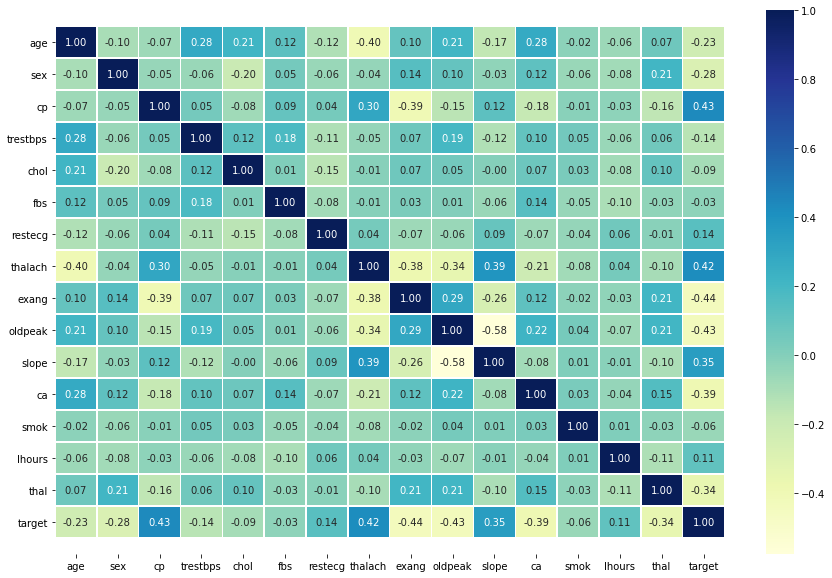

In [9]:
# lets make our corr a little nice
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True, linewidths=0.5,
                fmt=".2f",             
                cmap="YlGnBu");


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
# splitting data
x = data.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,smok,lhours,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,2,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,0,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,2


In [11]:
y = data["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,smok,lhours,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,0,0,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,0,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,0,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,0,2,1


In [14]:
y_train.head()

269    0
59     1
58     1
292    0
62     1
Name: target, dtype: int64

In [15]:
logreg = LogisticRegression()

In [16]:
logreg.fit(x_train, y_train)
logreg.score(x_train, y_train)

C:\Users\richmond\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8925619834710744

In [17]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [18]:
y_test

82     1
225    0
274    0
162    1
222    0
      ..
25     1
54     1
81     1
297    0
268    0
Name: target, Length: 61, dtype: int64

In [19]:
logreg.score(x_train, y_train)

0.8925619834710744

In [20]:
logreg.score(x_test, y_test)

0.7540983606557377

In [21]:
clf = RandomForestClassifier()

In [22]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [23]:
y_test

82     1
225    0
274    0
162    1
222    0
      ..
25     1
54     1
81     1
297    0
268    0
Name: target, Length: 61, dtype: int64

In [24]:
clf.score(x_train, y_train)

1.0

In [25]:
clf.score(x_test, y_test)

0.8032786885245902

# Improving results

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
rs_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(rs_rf)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rs_rf, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [65]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [66]:
baseline = RandomForestRegressor(n_estimators = 10, random_state = 42)
baseline.fit(x_train, y_train)
baseline = evaluate(baseline, x_test, y_test)

Model Performance
Average Error: 0.2869 degrees.
Accuracy = -inf%.


In [52]:
baseline

-inf